In [1]:
%matplotlib inline
#%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
print("DONE")

DONE


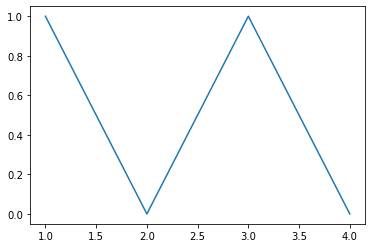

In [3]:
plt.plot([1,2,3,4],[1,0,1,0])

In [4]:
from main_classes.voltage_maps import VoltageMap
from main_classes.epsilon_cover import build_epsilon_covers, estimate_densities
from utilities.generate_toy_data import non_uniform_1d_experiment
from definitions import CONFIG_VOLTAGE_MAPS_PATH
from config.yaml_functions import yaml_loader
print("DONE")

DONE


### Setup

In [5]:
lvl_of_interest = 9
num_data_samples = 20000
source_center = np.array([0.2]).reshape(-1, 1)
config = yaml_loader(CONFIG_VOLTAGE_MAPS_PATH)
print("DONE")

DONE


### Construct toy data

In [6]:
data = np.random.uniform(0, 1, num_data_samples)
#data = np.linspace(0, 1, num_data_samples)
data = data.reshape(-1, 1)

source_center_index = 0
data = np.concatenate((source_center, data))
print("DONE")

DONE


### Generate an epsilon cover

In [7]:
epsilon_cover = build_epsilon_covers(data)
epsilon_cover_lvl = epsilon_cover[lvl_of_interest]

number of processed points = 0
number of processed points = 10000
number of processed points = 20000


In [8]:
epsilon_cover_centers = epsilon_cover_lvl['centers']
densities = estimate_densities(epsilon_cover_centers, data)
epsilon_cover_lvl['densities'] = densities
print("DONE")

DONE


In [9]:
sort_indices = np.argsort(epsilon_cover_centers, axis=0).flatten()
densities = epsilon_cover_lvl['densities']
indices = epsilon_cover_lvl['indices']

epsilon_cover_centers = epsilon_cover_centers[sort_indices]
densities = densities[sort_indices]
indices = indices[sort_indices]
print("DONE")

DONE


### Voltage maps

#### Using region source with density scaling

In [10]:
epsilon_cover_lvl['centers'].shape

(416, 1)

In [11]:
voltage_map = VoltageMap(config, epsilon_cover_lvl, source_center_index, weight_to_ground=1.e-1, is_source_region=True)
voltage_map.trimmer()
voltage_map.construct_transition_matrix()
voltage_map.propagate_voltage()
print("Done")

propagating labels:   4%|█▌                                     | 39/1000 [00:00<00:00, 2470.07it/s]

Done


In [12]:
voltage_region_source = voltage_map.get_voltage()
voltage_region_source = voltage_region_source[sort_indices]
voltage_region_source.shape

(416,)

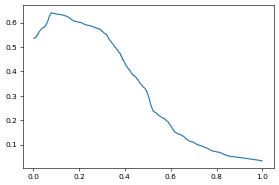

In [13]:
plt.figure()
plt.plot(data[indices], voltage_region_source);

#### Using point source with density scaling

In [24]:
voltage_map = VoltageMap(config, epsilon_cover_lvl, source_center_index, weight_to_ground=0.5, is_source_region=False)
voltage_map.trimmer()
voltage_map.construct_transition_matrix()
voltage_map.propagate_voltage()
print("Done")

propagating labels:   0%|                                        | 3/1000 [00:00<00:00, 2988.11it/s]

Done


In [25]:
voltage_point_source = voltage_map.get_voltage()
voltage_point_source = voltage_point_source[sort_indices]
print("DONE")

DONE


DONE


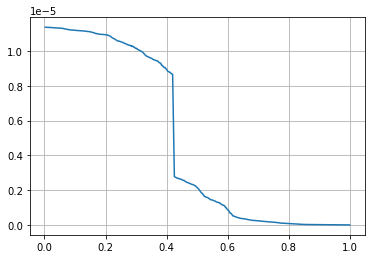

In [26]:
plt.figure()
plt.plot(data[indices], voltage_point_source)
plt.show()
plt.grid()
print("DONE")

### Visualize

DONE


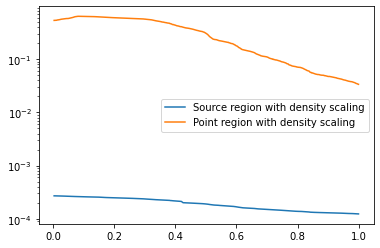

In [17]:
plt.figure()
plt.plot(data[indices], voltage_point_source, label='Source region with density scaling')
plt.plot(data[indices], voltage_region_source, label='Point region with density scaling')
plt.yscale('log')
plt.legend()
plt.show()
print("DONE")

In [18]:
### To get the same order of magnitude on the two plots, we multiply with a suitable factor
factor = max(voltage_region_source)/max(voltage_point_source)
voltage_point_source_scaled  = voltage_point_source*factor

In [19]:
factor

2372.221104325623

DONE


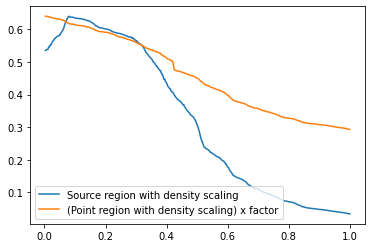

In [20]:
plt.figure()
plt.plot(data[indices], voltage_region_source, label='Source region with density scaling')
plt.plot(data[indices], voltage_point_source_scaled, label='(Point region with density scaling) x factor')
plt.legend()
plt.show()
print("DONE")